<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_05_01_dmd_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
#Define the functions
def f1(xx, tt):
#    y_1 = 1 * np.cos(xx) * np.exp(1j * tt)
#    y_1 = 2 * np.cos(xx) * np.exp((0.2+2*np.pi*2*1j) * tt)
    y_1 = np.exp(-xx**2 * 0.2) * np.cos(4 * xx) * np.exp(2.3j * tt)
    return y_1

def f2(xx, tt):
#    y_2 = np.sin(xx) * np.exp(3j * tt)
#    y_2 = np.sin(xx) * np.exp((-0.2+2*np.pi*1*1j) * tt)
    y_2 = (1 - np.exp(1 - xx**2 / 6)) * np.exp(1.3j * tt)
    return y_2

def f3(xx, tt):
#    y_3 = 0.5*np.sin(2*xx) * np.exp(5j * tt)
#    y_3 = 1*np.sin(2*xx) * np.exp((-0.1+2*np.pi*1*1j) * tt)
    y_3 = (-0.02 * xx**2 + 1) * (1.1j**(-2 * tt))
    return y_3


In [90]:
#Define time and space discretizations
xi = np.linspace(-5, 5, 512)
t = np.linspace(0, 4*np.pi, 256)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t,xi)

noisy = True
if noisy:
        # Calculate the noise levels
        noise_level = 0.0  # Adjust as needed
        noise1 = np.random.normal(scale=noise_level, size=tt.shape)
        noise2 = np.random.normal(scale=noise_level, size=tt.shape)
        noise3 = np.random.normal(scale=noise_level, size=tt.shape)
        f1_noisy = f1(xx, tt) + noise1
        f2_noisy = f2(xx, tt) + noise2
        f3_noisy = f3(xx, tt) + noise3
        # Combine the noisy functions
        X = f1_noisy + f2_noisy + f3_noisy
else:
        f1 = f1(xx, tt)
        f2 = f2(xx, tt)
        f3 = f3(xx, tt)
        X = f1 + f2 + f3


In [91]:
print(dt)

0.04927988476219283


In [92]:
print(X.shape)

(512, 256)


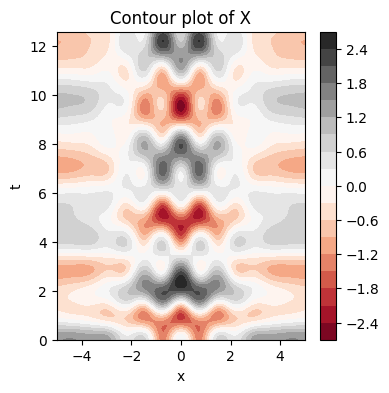

In [93]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, X.real, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()

In [94]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [95]:
print(X_1.shape, X_2.shape)

(512, 255) (512, 255)


In [110]:
U, S, VT = np.linalg.svd(X_1,full_matrices=True)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(512, 512) (255, 255) (255, 255)


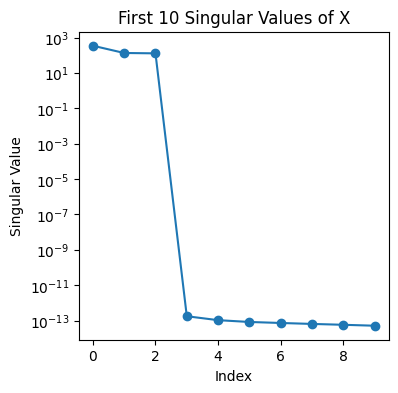

In [123]:
# Singular Values
plt.figure(figsize=(4, 4))
plt.semilogy(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [128]:
print(S[:3,:3])


[[349.61441808   0.           0.        ]
 [  0.         135.79819713   0.        ]
 [  0.           0.         129.44313563]]


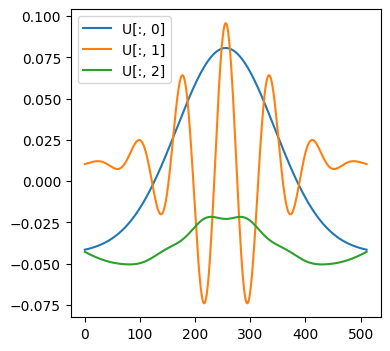

In [129]:
# U
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3]/5, label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()

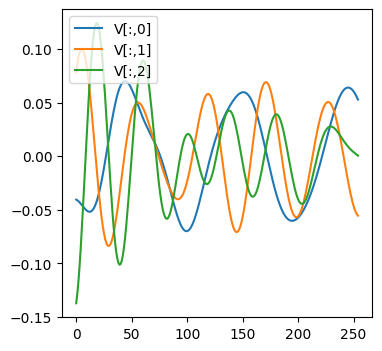

In [132]:
# V
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
plt.plot(V[:,2], label='V[:,2]')
#plt.plot(V[:,3]/5, label='V[:,3]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [133]:
r =3
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(512, 3) (3, 3) (255, 3)


In [134]:
print(X_2.shape)

(512, 255)


In [135]:
print(Ur[:3,:3])

[[-0.0416237 -0.00020234j  0.01029652-0.01126561j -0.04290547-0.00658288j]
 [-0.04154841-0.00019749j  0.01039309-0.01127226j -0.04308315-0.00659074j]
 [-0.04147135-0.00019261j  0.01049125-0.01127709j -0.04325937-0.00659752j]]


In [136]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [137]:
print(A_tilde)

[[ 9.98717462e-01+0.05868952j -2.45559975e-02-0.01643321j
  -1.85269548e-03+0.08508643j]
 [ 3.48792961e-03-0.00209868j  9.91862438e-01+0.08493014j
  -6.54935584e-02+0.04762114j]
 [-3.33096055e-04+0.01202278j  7.08746891e-02+0.03947956j
   9.79753961e-01-0.1192563j ]]


In [138]:
Lambda, W = np.linalg.eig(A_tilde)

In [139]:
#Lambda = np.diag(Lambda)
print(Lambda)

[0.97880178-0.15275788j 0.99794861+0.06402004j 0.99358347+0.11310121j]


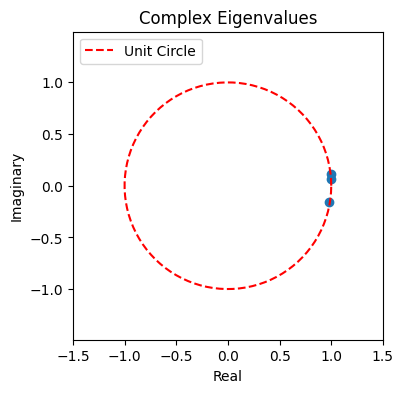

In [140]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
#plt.grid(True)
plt.legend(loc='upper left')
plt.show()

[0.99065023 1.         1.        ]


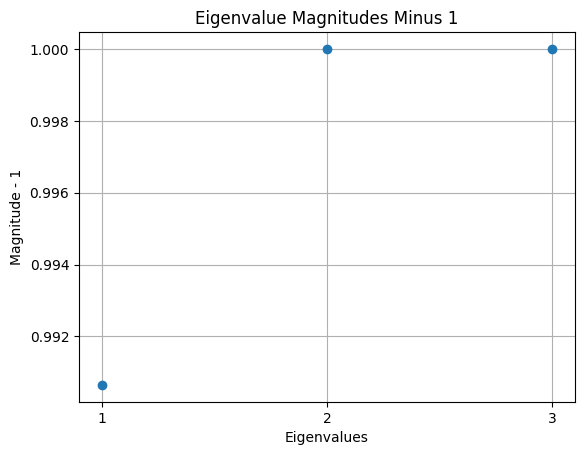

In [142]:
#mag = np.abs(Lambda)
mag = np.sqrt(Lambda.real**2 + Lambda.imag**2)
print(mag)
magm1 = mag

# Create an integer array for x-axis: 1, 2, 3, ...
x_indices = np.arange(1, len(magm1) + 1)

# Plot
plt.figure()
plt.plot(x_indices, magm1, 'o')
plt.xlabel('Eigenvalues')
plt.ylabel('Magnitude - 1')
plt.title('Eigenvalue Magnitudes Minus 1')
plt.grid(True)
plt.xticks(x_indices)
plt.show()

In [143]:
print(W)

[[-3.87901840e-01-0.04501656j  9.98215435e-01+0.j
   8.78734408e-04-0.00199162j]
 [-1.62985609e-01-0.25464211j -9.68819809e-03-0.01933824j
   9.44251002e-01+0.j        ]
 [ 8.69539396e-01+0.j          5.52340771e-02+0.00687841j
   1.77006224e-01-0.27758621j]]


In [144]:
#DMD Modes
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [145]:
print(Phi[:3,:])

[[-0.02586911-0.00053238j -0.04404008-0.00377787j  0.0002405 +0.00021852j]
 [-0.02607122-0.00053654j -0.04397597-0.00377237j  0.00029306+0.00026628j]
 [-0.02627252-0.00054068j -0.04391   -0.00376671j  0.00034751+0.00031575j]]


In [146]:
#Discrete-time eigenvalues
alpha = np.log(Lambda)/dt

In [148]:
print(alpha.shape)
print(alpha)
print("Notice the imaginary parts", np.imag(alpha))


(3,)
[-1.90620360e-01-3.14159265j  1.80107236e-14+1.3j
 -6.40033946e-15+2.3j       ]
Notice the imaginary parts [-3.14159265  1.3         2.3       ]


In [149]:
# Amplitudes of the DMD modes
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [153]:
print(amp.shape)
print(amp)

(3,)
[-19.31988597+0.39759656j -21.5907653 +1.8521092j
   6.26275727-5.69046034j]


In [154]:
# Eq (10) Dynamics of the DMD modes
t_exp = np.arange(X.shape[1]) * dt

temp = np.repeat(alpha.reshape(-1,1), t_exp.size, axis=1)

dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)

print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(256,) (3, 256) (3, 256)
256
256


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


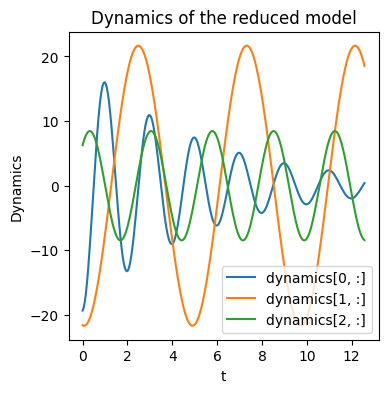

In [155]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.plot(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


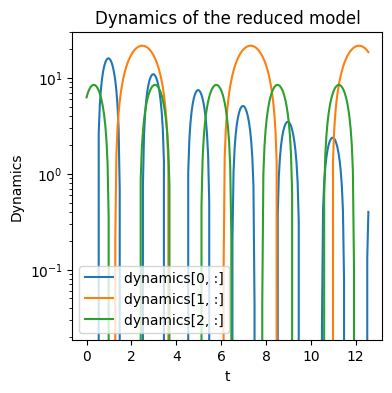

In [156]:
plt.figure(figsize=(4, 4))
plt.semilogy(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.semilogy(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.semilogy(t_exp, dynamics[2, :], '-', label='dynamics[2, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [157]:
# Eq (10) in the notes
# Field Reconstruction

X_dmd = Phi @ dynamics
print(X_dmd.shape)

(512, 256)


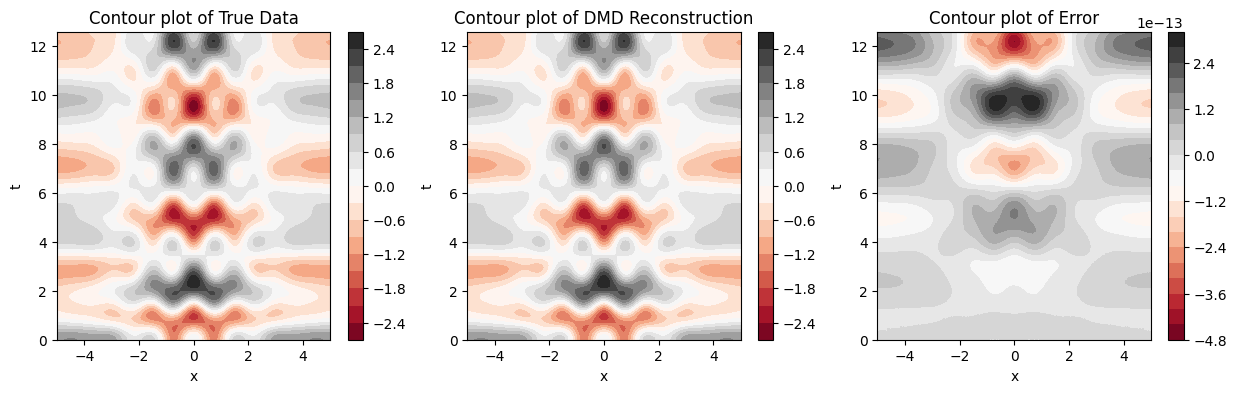

In [161]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of True Data')

plt.subplot(1, 3, 2)
plt.contourf(xx, tt, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of DMD Reconstruction')

X_diff = np.real(X) - np.real(X_dmd)
#levels = np.linspace(-1E-11, 1E-11, 21)
levels = 20
plt.subplot(1, 3, 3)
plt.contourf(xx, tt, X_diff , levels=levels, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')


plt.show()